In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import string
import nltk
import warnings
warnings.filterwarnings('ignore')


In [28]:
df = pd.read_csv(r"C:\Users\cedcoss\Desktop\FinalBalancedDataset.csv")

In [29]:
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [30]:
df = df.iloc[:,1:3]

In [31]:
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [32]:
# remove patterns in input text
def remove_patterns(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for words in r:
        input_txt = re.sub(words,"",input_txt)
    return input_txt  

<Axes: >

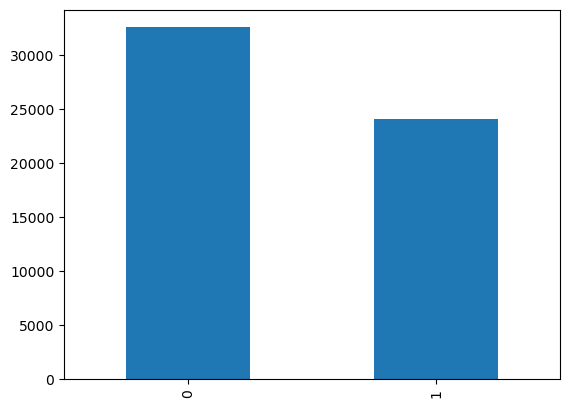

In [33]:
df['Toxicity'].value_counts().plot(kind="bar")

In [34]:
# remove twitter handles @ and all
df['clean_tweet'] = np.vectorize(remove_patterns)(df['tweet'],"@[\w]*")

In [35]:
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [36]:
# removing special characters.numbers and punctuation
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now #motivation


In [37]:
# removing shorter words with the help of list comprehesion
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : " ".join([words for words in x.split() if len(words)>3]))
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguide society #motivation


In [39]:
# Tokenize the tokens individual words
tokenized_tweets = df['clean_tweet'].apply(lambda x : x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [41]:
# Stemming the words (it removes ily ing words like that to make sentence shorter it narrow down the words to their base words like fight, figher ,fighting to fight only)
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, cau, they, offer, wheel...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [42]:
df.head()

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguide society #motivation


In [43]:
# combine all the above tokenized tweet into single sentences
for i in range(len(tokenized_tweets)):
   tokenized_tweets[i]=" ".join(tokenized_tweets[i])
df['clean_tweet'] = tokenized_tweets
df.head()         

,Toxicity,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cau they offer wheelchair v...
2,0,bihday your majesty,bihday your majesti
3,0,#model i love u take with u all the time in ...,#model love take with time
4,0,factsguide: society now #motivation,factsguid societi #motiv


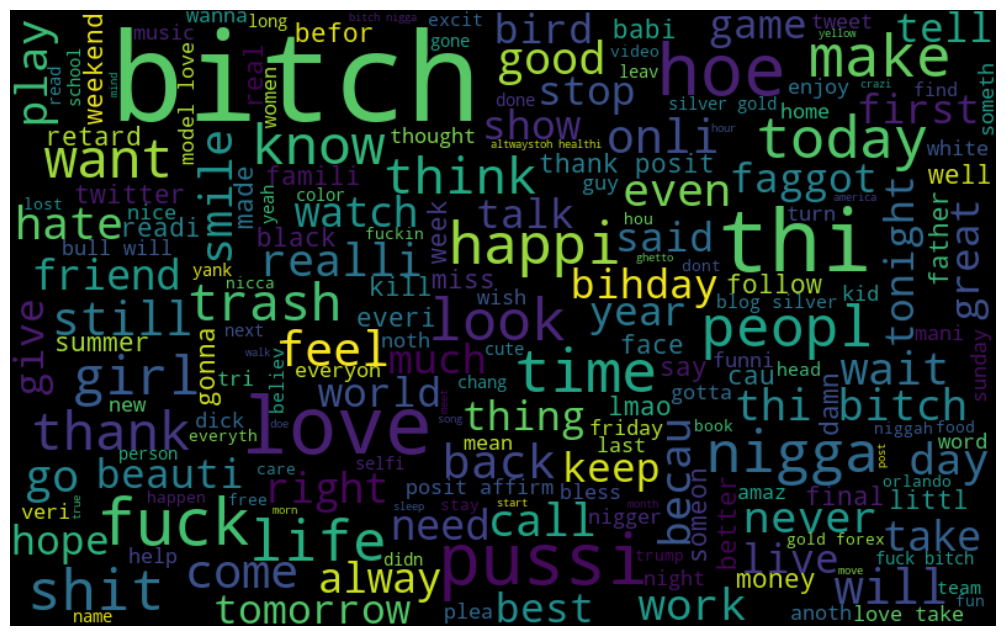

In [48]:
all_words = " ".join(i for i in df["clean_tweet"])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500,random_state =42,max_font_size=100).generate(all_words)

# plot the graph with the help of matplotlib
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

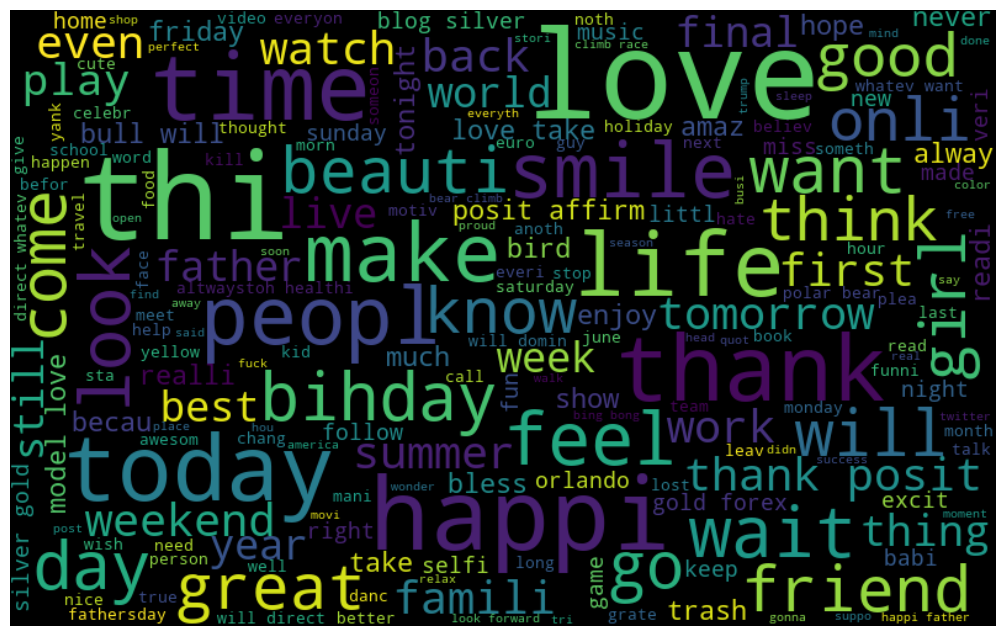

In [50]:
all_words = " ".join([i for i in df["clean_tweet"][df['Toxicity']==0]])

wordcloud = WordCloud(width=800, height=500,random_state =42,max_font_size=100).generate(all_words)

# plot the graph with the help of matplotlib
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

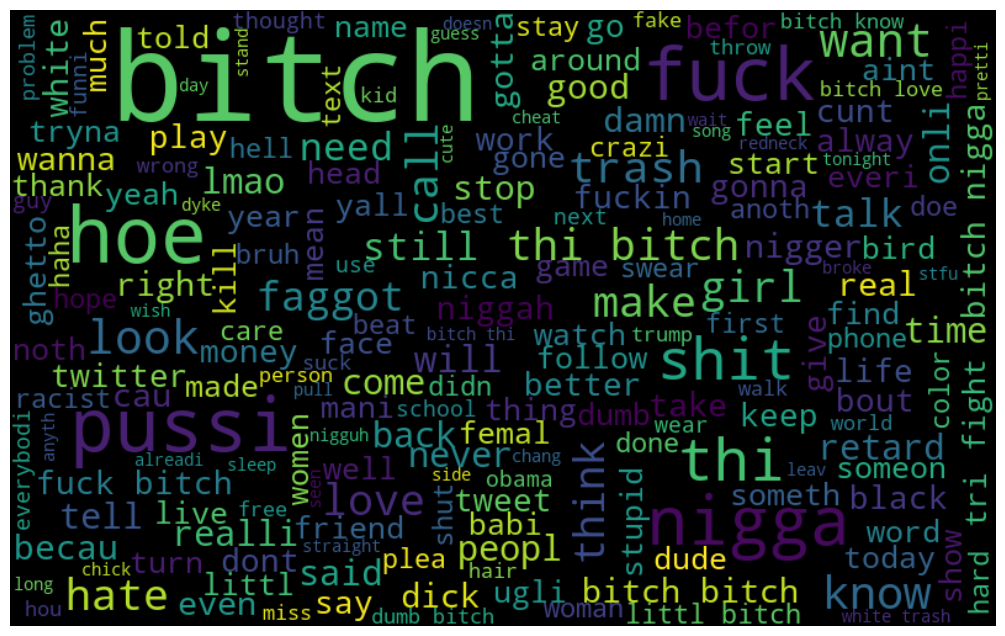

In [51]:
all_words = " ".join([i for i in df["clean_tweet"][df['Toxicity']==1]])

wordcloud = WordCloud(width=800, height=500,random_state =42,max_font_size=100).generate(all_words)

# plot the graph with the help of matplotlib
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
# extracting the hastags
def hastags(clean_tweet):
    hashtags=[]
    
    for word in clean_tweet:
        ht = re.findall(r"#(\w+)",word)
        hashtags.append(ht)

    return hashtags 

In [54]:
# for non racsist /sexiest tweets
ht_postive = hastags(df['clean_tweet'][df['Toxicity']==0])

# for racsist /sexiest tweets
ht_negative = hastags(df['clean_tweet'][df['Toxicity']==1])

In [55]:
# unnest list
# combine all them into simple list making list of list as list only [[]]-->[]
ht_postive = sum(ht_postive,[])
ht_negative = sum(ht_negative,[])

In [56]:
freq = nltk.FreqDist(ht_postive)
d = pd.DataFrame({"Hashtags":list(freq.keys()),
                'Counts':list(freq.values())})
d.head()

,Hashtags,Counts
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


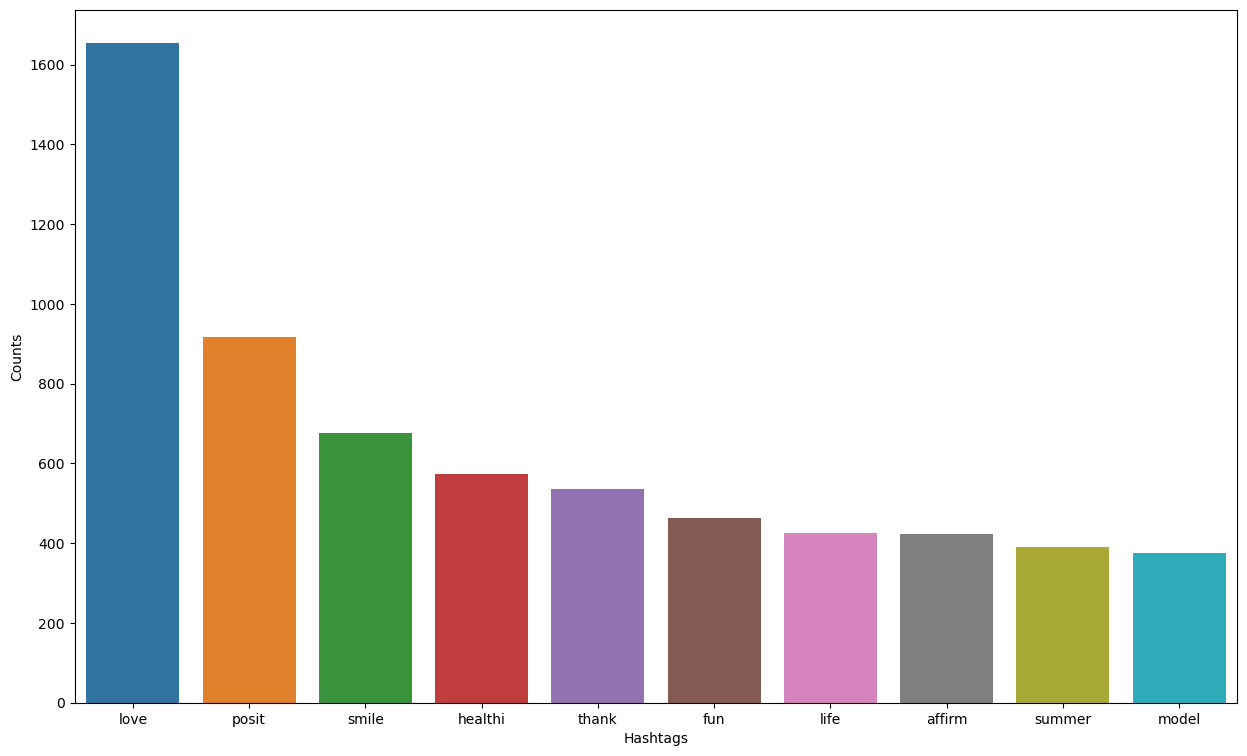

In [57]:
# selecting top 10 hashtags
import seaborn as sns
d = d.nlargest(columns ='Counts',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x="Hashtags",y="Counts")
plt.show()

In [59]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({"Hashtags":list(freq.keys()),
                'Counts':list(freq.values())})
d.head()

,Hashtags,Counts
0,cnn,10
1,michigan,2
2,tcot,45
3,australia,6
4,opkillingbay,5


In [60]:
# bow[0].toarray()
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve , auc

In [61]:
# Feature selection,extraction
# convert text into numerical vectors for machine to understand

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90,min_df=2,max_features =1000,stop_words='english') #hyperparameter tuning
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [66]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(bow,df['Toxicity'],random_state=40,test_size=0.25)

In [67]:
# Training the model over decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
# prediction
y_pred = clf.predict(X_test)

Accuracy:  0.8826390357369422
Precision : 0.8826390357369422
Recall : 0.8826390357369422
F1 Score : 0.8826390357369422
Confusion Matrix:
[[7368  775]
 [ 890 5154]]


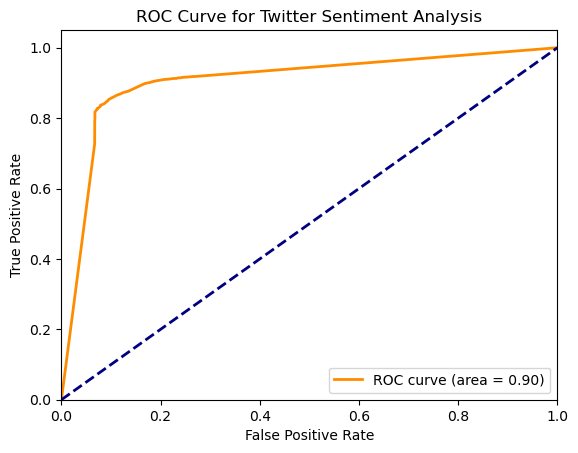

In [69]:
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average = 'micro'))
print("Recall :",recall_score(y_test,y_pred,average = 'micro'))
print("F1 Score :",f1_score(y_test,y_pred,average = 'micro'))

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# # Diagonal elements shows the correct predictions

# # Calculate the ROC AUC score

# Step 5: Make predictions and obtain sentiment scores
y_scores = clf.predict_proba(X_test)[:, 1]

# Step 6: Calculate the True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Twitter Sentiment Analysis')
plt.legend(loc="lower right")
plt.show()


In [70]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: C:\Users\cedcoss
